# Packages

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Geometric Transformations of Images


## 1. Basic Example

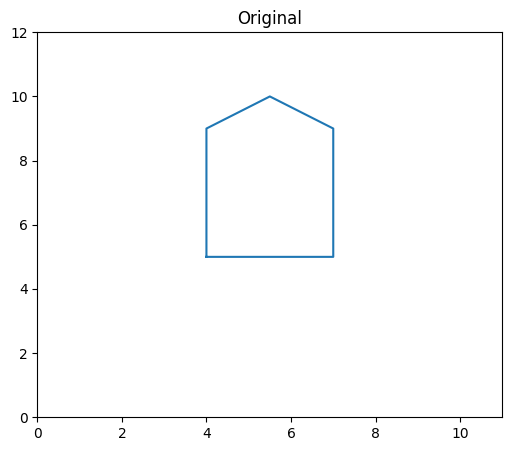

In [2]:
fig, ax = plt.subplots(figsize = (6, 5))
P = np.array([[4, 5],
              [7, 5],
              [7, 9],
              [5.5, 10],
              [4, 9],
              [4, 5]]).T

ax.set_title('Original')
ax.set_xlim([0, 11])
ax.set_ylim([0, 12])

ax.plot(P[0], P[1])

plt.show()

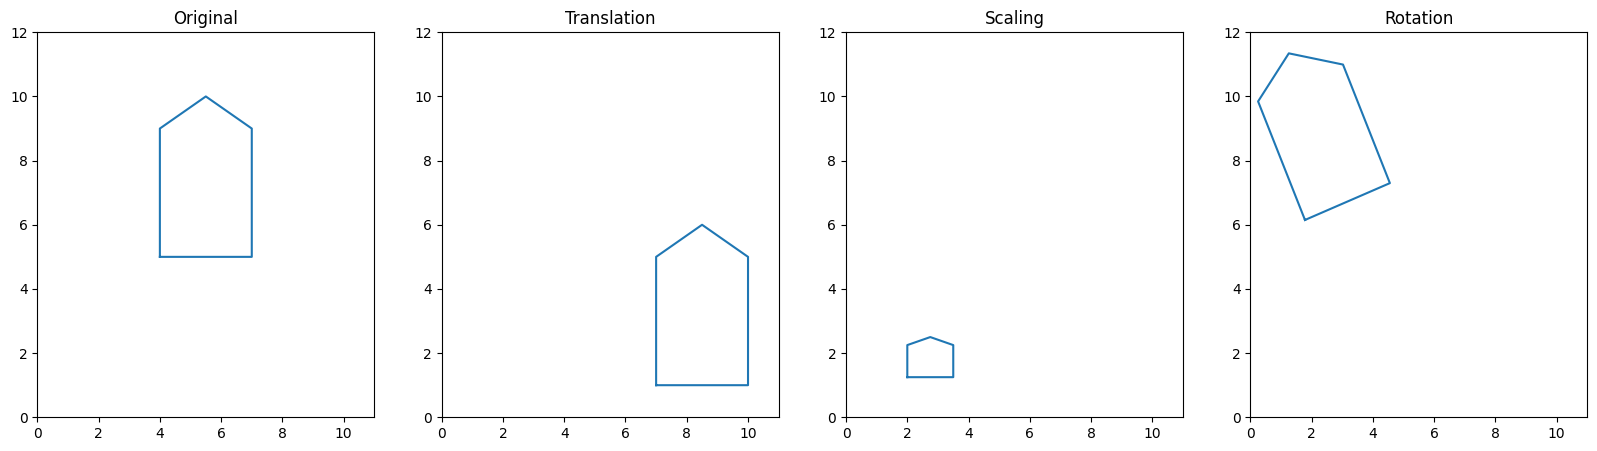

In [3]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize = (20, 5))

ax1.set_title('Original')
ax1.set_xlim([0, 11])
ax1.set_ylim([0, 12])

ax2.set_title('Translation')
ax2.set_xlim([0, 11])
ax2.set_ylim([0, 12])

ax3.set_title('Scaling')
ax3.set_xlim([0, 11])
ax3.set_ylim([0, 12])

ax4.set_title('Rotation')
ax4.set_xlim([0, 11])
ax4.set_ylim([0, 12])

# Translation
P1 = P + np.array([[3, -4]]).T 

# Scaling
P2 = P * np.array([[0.5, 0.25]]).T

# Rotation
P3 = np.array([P[0] * np.cos(np.pi / 8) - P[1] * np.sin(np.pi / 8),
               P[0] * np.sin(np.pi / 8) + P[1] * np.cos(np.pi / 8)]) 


ax1.plot(P[0], P[1])
ax2.plot(P1[0], P1[1])
ax3.plot(P2[0], P2[1])
ax4.plot(P3[0], P3[1])

plt.show()

## 2. Example with a figure (OpenCV and From Scratch)

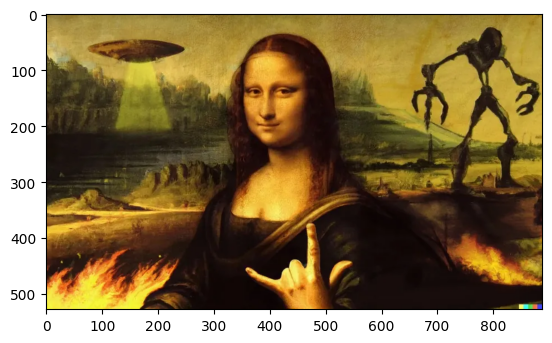

In [4]:
img = cv2.cvtColor(cv2.imread('images/dall-e-2.jpg'), cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()

## 2.1 Translation

In [5]:
def translate(img, dx, dy):
  M = np.array([[1, 0, dx],
                [0, 1, dy],
                [0, 0, 1]])

  img_translated = np.full_like(img, 0)

  for x, row in enumerate(img):
      for y, pixel in enumerate(row):
          P = np.array([x, y, 1])
          P1 = M @ P
          x1, y1, _ = P1
          if x1 >= 0 and x1 < img.shape[0]:
            if y1 >= 0 and y1 < img.shape[1]:
              img_translated[x1, y1] = pixel

  return img_translated

In [6]:
translated_from_scratch = translate(img, 50, 50)

# OpenCV
x = 50
y = 50
T = np.float32([[1, 0, x], [0, 1, y]])

print('Translation Matrix')
print(T)

translated_cv2 = cv2.warpAffine(img, T, (img.shape[1], img.shape[0]))

Translation Matrix
[[ 1.  0. 50.]
 [ 0.  1. 50.]]


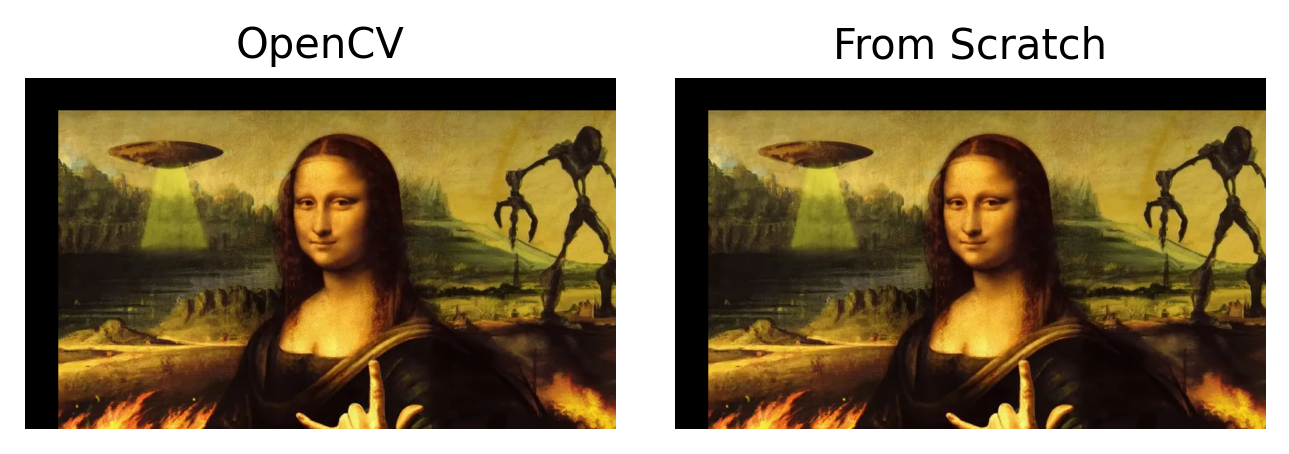

In [7]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, dpi = 250)
ax[0].imshow(translated_cv2)
ax[1].imshow(translated_from_scratch)

ax[0].set_title('OpenCV')
ax[0].axis('off')
ax[1].set_title('From Scratch')
ax[1].axis('off')

plt.subplots_adjust(wspace = 0.1)

plt.show()

## 2.2 Scaling

In [8]:
def scale(img, sx, sy, dx, dy):
  S = np.array([[sx, 0, dx],
                [0, sy, dy],
                [0, 0, 1]])

  img_scaled = np.full_like(img, 0)

  for x, row in enumerate(img):
      for y, pixel in enumerate(row):
          P = np.array([y, x, 1])
          P1 = S @ P
          x1, y1, _ = P1.astype(int)
          if x1 >= 0 and x1 < img.shape[1]:
            if y1 >= 0 and y1 < img.shape[0]:
              img_scaled[y1, x1] = pixel

  return img_scaled

In [9]:
scaled_from_scratch = scale(img, 0.7, 0.3, 50, 50)

# OpenCV
sx = 0.7 # scale factor along the horizontal axis
sy = 0.3 # scale factor along the vertical axis

S = np.float32([[sx, 0, 50], [0, sy, 50]])

print('Scale Matrix')
print(S)

scaled_cv2 = cv2.warpAffine(img, S, (img.shape[1], img.shape[0]))

Scale Matrix
[[ 0.7  0.  50. ]
 [ 0.   0.3 50. ]]


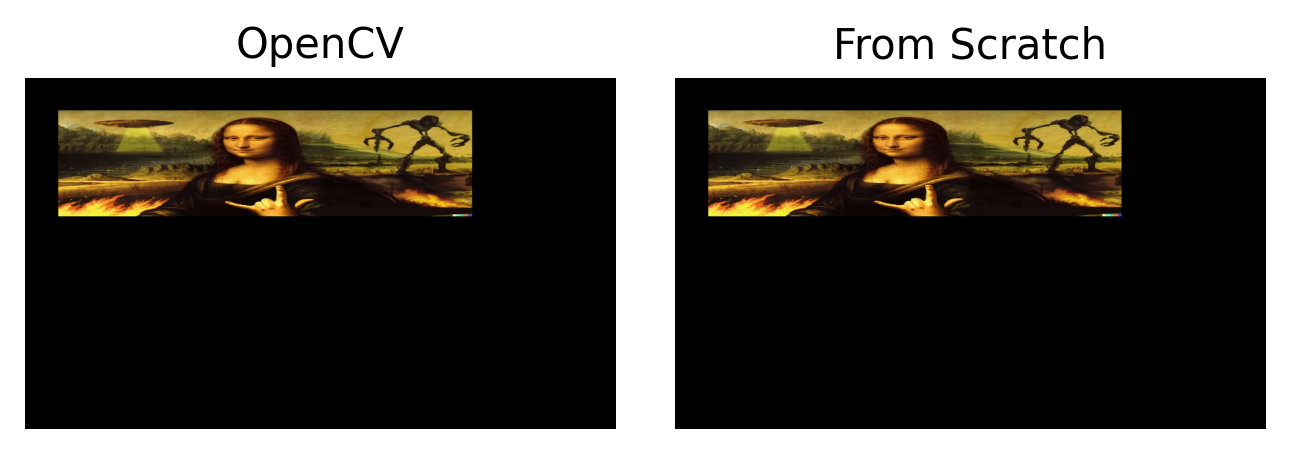

In [10]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, dpi = 250)
ax[0].imshow(scaled_cv2)
ax[1].imshow(scaled_from_scratch)

ax[0].set_title('OpenCV')
ax[0].axis('off')
ax[1].set_title('From Scratch')
ax[1].axis('off')

plt.subplots_adjust(wspace = 0.1)

plt.show()

## 2.3 Rotation

In [11]:
def rotate(img, degree):
  t = np.deg2rad(degree)
  R = np.array([[np.cos(t), -np.sin(t), 0],
                [np.sin(t), np.cos(t), 0],
                [0, 0, 1]])

  img_rotated = np.full_like(img, 0)

  for x, row in enumerate(img):
      for y, pixel in enumerate(row):
          P = np.array([y, x, 1])
          P1 = R @ P
          x1, y1, _ = P1.astype(int)

          if x1 >= 0 and x1 < img.shape[1]:
            if y1 >= 0 and y1 < img.shape[0]:
              img_rotated[y1, x1] = pixel

  return img_rotated

In [12]:
rotated_from_scratch = rotate(img, 30)

# OpenCV
t = np.deg2rad(30)

R = np.float32([[np.cos(t),-np.sin(t),0], [np.sin(t),np.cos(t),0]])
h, w = img.shape[:2]

rotated_cv2 = cv2.warpAffine(img, R, (w, h))

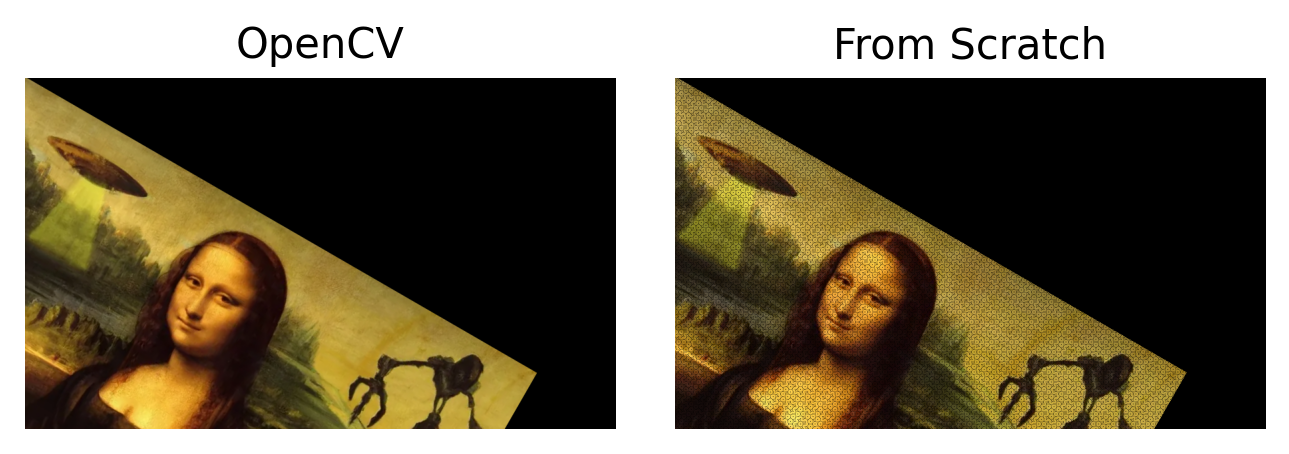

In [13]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, dpi = 250)
ax[0].imshow(rotated_cv2)
ax[1].imshow(rotated_from_scratch)

ax[0].set_title('OpenCV')
ax[0].axis('off')
ax[1].set_title('From Scratch')
ax[1].axis('off')

plt.subplots_adjust(wspace = 0.1)

plt.show()

## 2.4 Affine Transformation

In [14]:
def AffineTransf(img, degree, scale):
  t = np.deg2rad(degree)
  s = scale
  # Normal Coordinates:
  A = np.array([[s * np.cos(t), -s * np.sin(t)],
                [s * np.sin(t), s * np.cos(t)]])

  h, w = img.shape[:2]

  # Affine Coordinates:
  M = np.float32([[A[0][0], A[0][1], -w / 2 * A[0][0] - h / 2 * A[0][1] + w / 2],
                  [A[1][0], A[1][1], -w / 2 * A[1][0] - h / 2 * A[1][1] + h / 2],
                  [0, 0, 1]])


  img_afim = np.full_like(img, 0)

  for x, row in enumerate(img):
      for y, pixel in enumerate(row):
          P = np.array([y, x, 1])
          P1 = M @ P
          x1, y1, _ = P1.astype(int)
          if x1 >= 0 and x1 < img.shape[1]:
            if y1 >= 0 and y1 < img.shape[0]:
              img_afim[y1, x1] = pixel

  return img_afim

In [15]:
affineTransf_from_scratch = AffineTransf(img, 30, 0.7)

# OpenCV
# Rotation with scaling
t = np.deg2rad(30)
s = .7

# Normal Coordinates:
A = np.array([[s * np.cos(t), -s * np.sin(t)],
              [s * np.sin(t), s * np.cos(t)]])

h, w = img.shape[:2]

# Affine Coordinates:
M = np.float32([[A[0][0], A[0][1], -w / 2 * A[0][0] - h / 2 * A[0][1] + w / 2],
                [A[1][0], A[1][1], -w / 2 * A[1][0] - h / 2 * A[1][1] + h / 2]])

affineTransf_cv2 = cv2.warpAffine(img, M, (w, h))

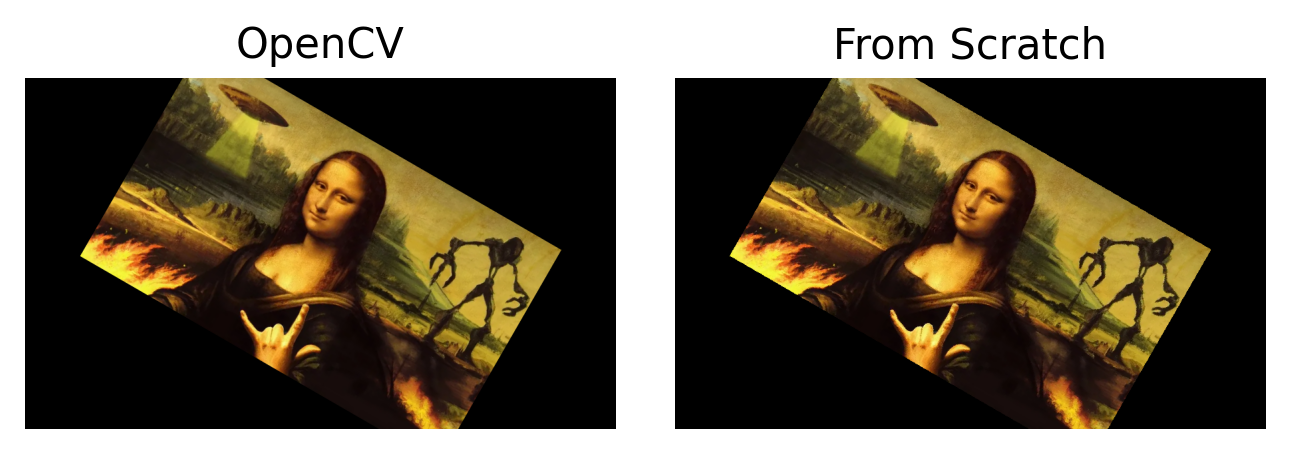

In [16]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, dpi = 250)
ax[0].imshow(affineTransf_cv2)
ax[1].imshow(affineTransf_from_scratch)

ax[0].set_title('OpenCV')
ax[0].axis('off')
ax[1].set_title('From Scratch')
ax[1].axis('off')

plt.subplots_adjust(wspace = 0.1)

plt.show()